# Data Visualization

*Erin Cameron*

---

## 1.0) Setup

In [ ]:
# Install packages
# !pip install requests
# !pip install xlrd
# !pip install openpyxl
# !pip install matplotlib
# !pip install folium

In [28]:
# Import packages
import sys
import pandas as pd
import requests
import matplotlib.pyplot as plt
import folium
import re
import seaborn as sns

In [7]:
# Read in the call count dataset
call_counts = pd.read_parquet('../data/tps_dispatch_counts_2010.parquet')
display(call_counts)

,FSA,counts,Geographic name,Province or territory,"Incompletely enumerated Indian reserves and Indian settlements, 2016",population,"Total private dwellings, 2016","Private dwellings occupied by usual residents, 2016",call_per_capita
0,M6K,4481,M6K,Ontario,NaN,40957.0,23344.0,22023.0,0.109407
1,M5A,4202,M5A,Ontario,NaN,41078.0,24186.0,22333.0,0.102293
2,M4C,3846,M4C,Ontario,NaN,46866.0,20178.0,19431.0,0.082064
3,M1E,3809,M1E,Ontario,NaN,46943.0,17637.0,17161.0,0.081141
4,M1P,3802,M1P,Ontario,NaN,45571.0,17129.0,16540.0,0.083430
...,...,...,...,...,...,...,...,...,...
149,N4S,1,N4S,Ontario,NaN,32254.0,14111.0,13758.0,0.000031
150,K0K,1,K0K,Ontario,NaN,111372.0,51289.0,44868.0,0.000009
151,L1Z,1,L1Z,Ontario,NaN,28446.0,8154.0,8054.0,0.000035
152,L1C,1,L1C,Ontario,NaN,43531.0,15805.0,15537.0,0.000023


In [13]:
# Read the dispatch dataset in
dispatches = pd.read_csv(r'../data/tps_incident_data_2010.csv', parse_dates=True, index_col="Dispatch_Time")
dispatches = dispatches.sort_index()
display(dispatches)

,ID,Incident_Type,Priority_Number,Units_Arrived_At_Scene,FSA
Dispatch_Time,,,,,
2010-01-01 00:01:36,3061660,Medical,4,2,M5R
2010-01-01 00:04:23,3061663,Medical,1,1,M5V
2010-01-01 00:05:52,3061664,Medical,5,1,M5N
2010-01-01 00:09:53,3061667,Medical,1,1,M4Y
2010-01-01 00:10:36,3061668,Medical,1,2,M6K
...,...,...,...,...,...
2010-12-31 23:54:16,3364482,Medical,4,1,M5B
2010-12-31 23:54:35,3364481,Medical,4,1,M1H
2010-12-31 23:54:40,3364480,Medical,1,1,M4X


## 2.0) Map Visualizations

### 2.1) Number of Dispatches per Postal Code

In [19]:
url = (
    "https://raw.githubusercontent.com/BlizzWiz/IBM_Capstone_Project/master"
)
call_geo = f"{url}/toronto_m.geojson"

map_dispatches_per_postal = folium.Map(location=[43.7000, -79.3832], zoom_start=10)

folium.Choropleth(
    geo_data=call_geo,
    name="choropleth",
    data=call_counts,
    columns=["FSA", "counts"], 
    key_on="feature.properties.CFSAUID",
    fill_color="BuPu",
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name="Number of Dispatches per Postal Code",
).add_to(map_dispatches_per_postal)

folium.LayerControl().add_to(map_dispatches_per_postal)

map_dispatches_per_postal

In [21]:
map_dispatches_per_postal.save("../results/map_number_dispatches_per_postal_code_2010.html")

### 2.2) Toronto Population, 2016

In [24]:
url = (
    "https://raw.githubusercontent.com/BlizzWiz/IBM_Capstone_Project/master"
)
call_geo = f"{url}/toronto_m.geojson"

map_toronto_pop = folium.Map(location=[43.7000, -79.3832], zoom_start=10)

folium.Choropleth(
    geo_data=call_geo,
    name="choropleth",
    data=call_counts,
    columns=["FSA", "population"], 
    key_on="feature.properties.CFSAUID",
    fill_color="BuPu",
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name="Population",
).add_to(map_toronto_pop)

folium.LayerControl().add_to(map_toronto_pop)

map_toronto_pop

In [25]:
map_toronto_pop.save("../results/map_toronto_population.html")

### 2.3) Number of Dispatches per Capita

In [26]:
url = (
    "https://raw.githubusercontent.com/BlizzWiz/IBM_Capstone_Project/master"
)
call_geo = f"{url}/toronto_m.geojson"

map_dispatches_per_capita = folium.Map(location=[43.7000, -79.3832], zoom_start=10)

folium.Choropleth(
    geo_data=call_geo,
    name="choropleth",
    data=call_counts,
    columns=["FSA", "call_per_capita"], 
    key_on="feature.properties.CFSAUID",
    fill_color="BuPu",
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name="Number of Dispatches per Capita",
).add_to(m)

folium.LayerControl().add_to(map_dispatches_per_capita)

map_dispatches_per_capita

In [27]:
map_dispatches_per_capita.save("../results/map_dispatches_per_capita.html")

## 3.0) Graph Visualizations

### 3.1) Setup

In [35]:
# Extract hour from Dispatch_Time
dispatches['hour'] = dispatches.index.hour

# Count dispatches by the hour
hourly_counts = dispatches.groupby('hour').size()
display(hourly_counts)

hour
0      6763
1      6092
2      5705
3      4916
4      4050
5      3832
6      4197
7      6063
8      8114
9      9732
10    10813
11    10925
12    11388
13    11298
14    11356
15    11183
16    10762
17    10794
18    10164
19    10726
20     9782
21     9476
22     8903
23     7771
dtype: int64

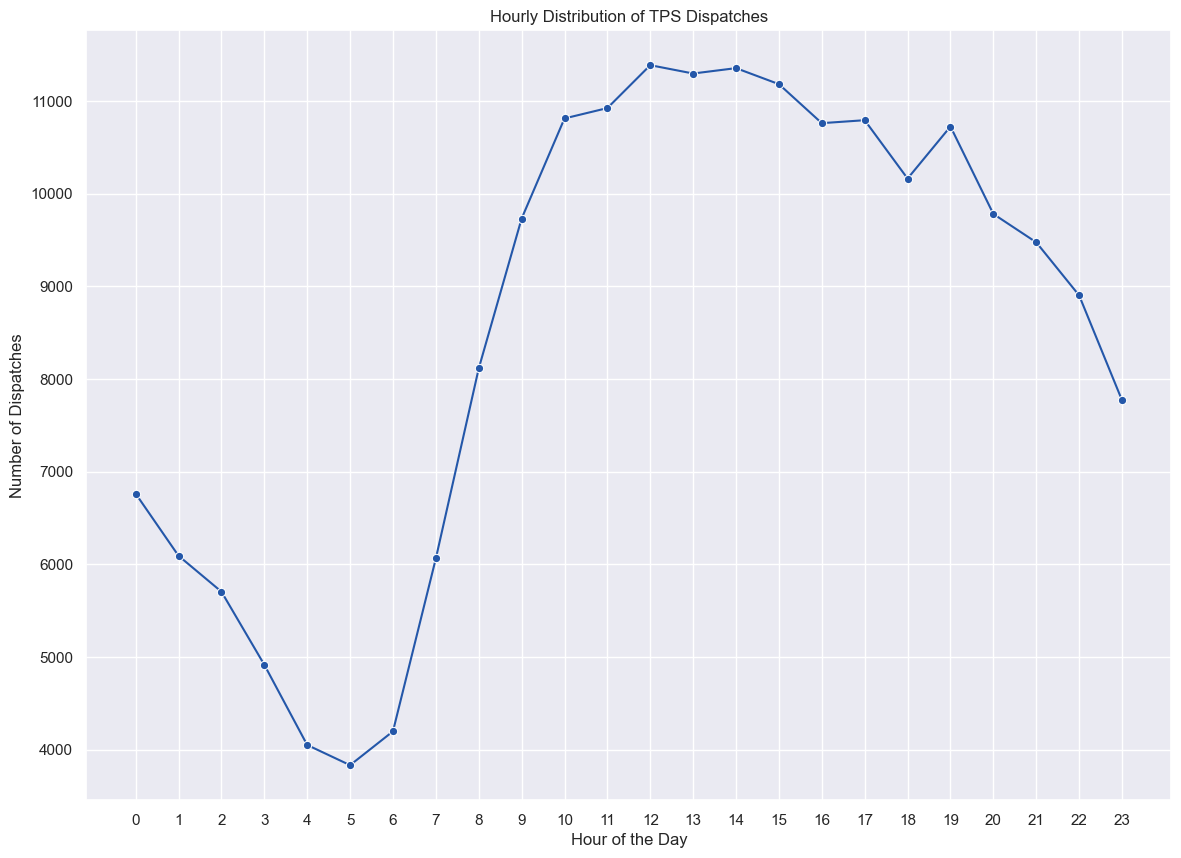

In [70]:
# Plot hourly distribution of dispatches in a line plot
sns.set(style='darkgrid')
dispatch_line = plt.figure(figsize=(14, 10))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker="o", markerfacecolor='#2457A9', color="#2457A9")
plt.xlabel("Hour of the Day")
# Set x-axis to display all values from 1 to 23
plt.xticks(range(24))
plt.ylabel("Number of Dispatches")
plt.title("Hourly Distribution of TPS Dispatches")
plt.grid(True)
plt.show()
# Save the figure
fig = dispatch_line.get_figure()
fig.savefig("../results/lineplot_dispatches_hourly_distribution.png")

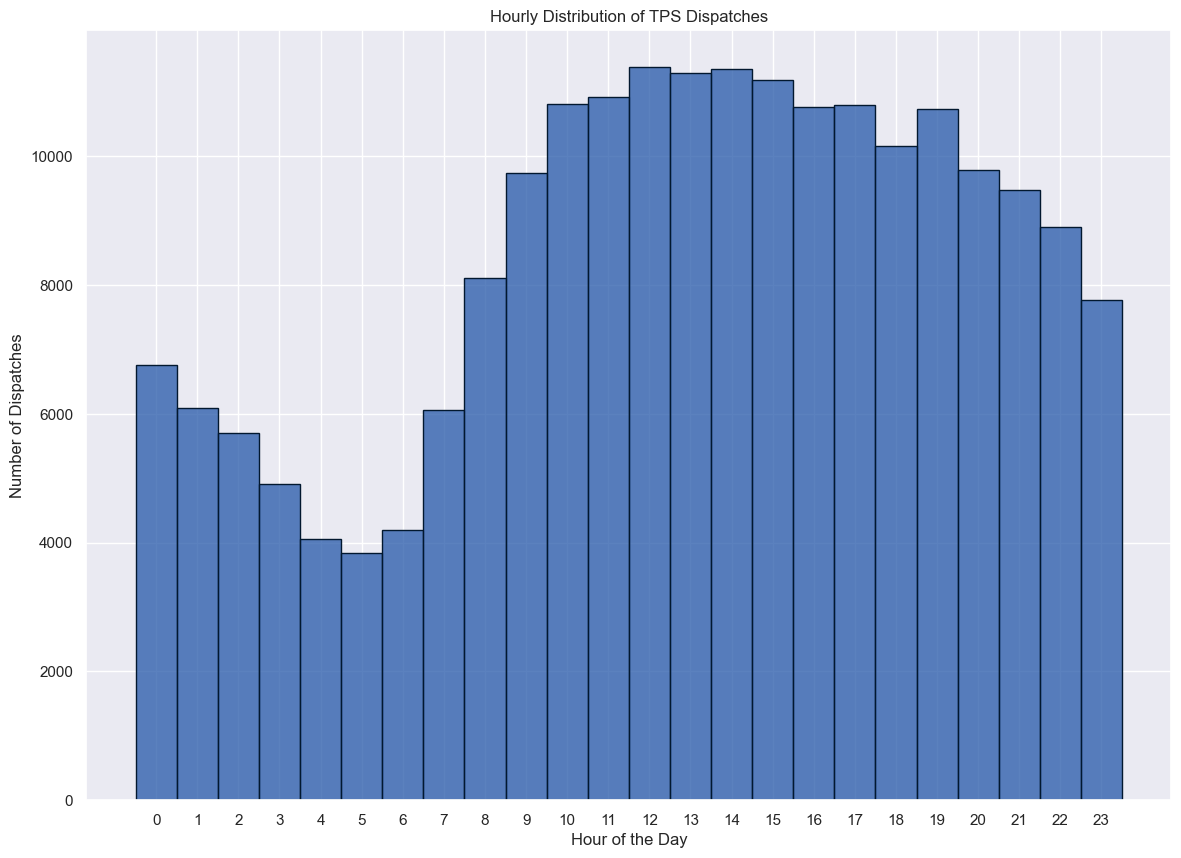

In [68]:
# Plot hourly distribution of dispatches in a histogram
plt.figure(figsize=(14, 10))
dispatch_hist = sns.histplot(data=dispatches, x=dispatches.hour, binwidth=1, discrete=True, color='#2457A9', edgecolor='#02182F')
plt.xlabel("Hour of the Day")
# Set x-axis to display all values from 1 to 23
plt.xticks(range(24))
plt.ylabel("Number of Dispatches")
plt.title("Hourly Distribution of TPS Dispatches")
plt.grid(True)
plt.show()
# Save the figure
fig = dispatch_hist.get_figure()
fig.savefig("../results/histplot_dispatches_hourly_distribution.png")

## 3.0) Heat Map Visualizations

### 3.1) Setup

Standard preprocessing steps prior to diving into visualizations:

    Timestamp Formatting: Converte time-based data for easier analysis.
    Geospatial Processing: Ensure latitude and longitude coordinates are properly formatted.

In [ ]:
# # Convert timestamps to datetime format
# dispatches['timestamp'] = pd.to_datetime(dispatches['Dispatch_Time'])

# # Extract all time components
# dispatches['hour'] = dispatches['timestamp'].dt.hour
# dispatches['day_of_week'] = dispatches['timestamp'].dt.day_name()

# # Drop unnecessary columns
# dispatches_cleaned = dispatches[['latitude', 'longitude', 'hour', 'day_of_week']]

In [17]:
dispatches["Incident_Type"].value_counts()

Incident_Type
Medical                   186600
Motor Vehicle Accident     13334
Emergency Transfer          3743
Fire                        1094
Airport Standby               34
Name: count, dtype: int64